Ab jetzt werden die mathematisch berechneten Werte für m und As eingesetzt. Für die Berechnung der maximal zu erreichenden Temperaturdifferenz, wird die maximale Leistung des Heizelements dem Temperaturverlust an die Umgebung gleichgesetzt. Dadurch wird der Punkt berechnet, bei dem sich die Wärmeenergie des Glastubus, bei konstanter Heizleistung, nicht mehr ändert.

$0 = q- h_sA_s(T-T_A)$

$T-T_a = q/(h_s A_s)$

Durch die gegebenen Werte für Masse und Aussenfläche des Tubus und einer Heizleistung von bis zu $2 kW$, ergibt sich eine maximal zu erreichende Temperaturdifferenz von 318.31 °K.

Durch genauerer Betrachtung der obrigen Formel lässt sich erkennen, dass sich die maximale Temperaturdifferenz linear zur anliegenden Leistung verhält. Dies bedeutet, dass bei doppelter Leistung auch eine doppelt so hohe Temperaturdifferenz erreicht werden kann.
                    

Durch die Lösung der Differentialgleichung, welche die Sprungantwort des Systems beschreibt, lässt sich ein PT1 Verhalten erkennen, dessen Sprungantwort der Folgenden Formel entspricht:
$$ v(t) = K(1-e^{\frac{-t}{T}}) \cdot u(t)$$
Wobei $u(t)$ dem Input des Systems in Form von Heizleistugn entspricht und $v(t)$ die Antwort des Systems in Form der Temperaturdifferenz ist. 
Beim Vergleich der Koeffizienten mit der Lösung der Differentialgleichung, lassen sich werte für $K$ und $T$ ermitteln.


$$T(t)=-(\frac{q}{A_s h_s})e^{-\frac{A_s h_s t}{c_p m}} + \frac{q}{A_s h_s}$$
$$ T(t) = \frac{q}{A_s h_s}(1-e^{\frac{-t A_s h_s}{c_p m}})$$


Skaliert man noch den Wert K mit dem Eingangssignal $q$, ergeben sich folgende Werte für die Parameter der Sprungantwort: 
$$ K = \frac{q}{A_s h_s} \cdot q = \frac{1}{A_s h_s}$$
$$ T = \frac{c_p m}{A_s h_s}$$

Darauf ergibt sich folgende Übertragungsfunktion:
$$ G(s) = \frac{K}{1 + T \cdot s} = \frac{\frac{1}{A_s h_s}}{1 + \frac{c_p m}{A_s h_s} \cdot s} $$

Nach Berechnung der Werte für K und T:
$$ G(s) = \frac{0.1592}{1 + 2830 \cdot s} $$


In [9]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import control as c

In [10]:
# Definition der Konstanten, fürt m und As die berechneten Werte
m = 16.49331431
As = 1.256637061
hs = 5
cp = 1078

In [11]:
#charakteristische Formel für das PT1 Verhalten
def func(x, K, T):
     return K*(1 - np.e**(-x/T))


In [12]:
#Kooeffizientenvergleich liefert werte für T und K
q = 2000
q_max = 2000
T = cp*m/(As*hs)
K = q/(As*hs)/q # skaliere k mit eingangsleistung
print ("K=" +str(K))
print ("T=" + str(T))

K=0.159154943147
T=2829.74191642


In [13]:
#transferfunktion von PT1
sys = c.tf([K],[T,1])
sys


  0.1592
----------
2830 s + 1

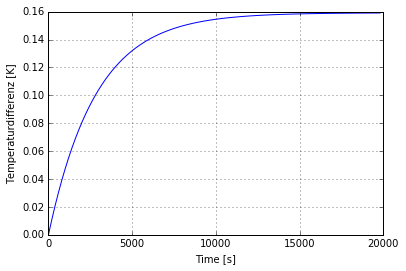

In [14]:
# unitstepresponce für sprung auf 1W
step_data = c.step_response(sys)
plt.plot(step_data[0],step_data[1])
plt.xlabel('Time [s]')
plt.ylabel('Temperaturdifferenz [K]')
plt.grid()

Die Grafik zeigt den Verlauf der Temperaturdifferenz für eine Sprungantwort auf 1 W des Aufgestellten PT1 Systems. Der Temperaturanstieg erfolgt ohne anfängliche Totzeit. Die Steigung ist anfangs maximal und lässt jedoch schnell nach, sodass das System gegen einen Wert von ca. $0.16 K$ konvergiert. Hierdurch lassen sich charakteristische Eigenschaften des Systems erkennen, keine Totzeit und ein logarithmischer Verlauf als Sprungantwort.


## Verhalten des Systems auf diverse Inputsignale

Im Folgenden wird näher auf den Verlauf der Temperaturdifferenz eingegangen, welche durch diverse Eingangssignale entsteht. Zunächst wird ein sinusförmiges Eingangssignal behandelt. Danach ein Eingangssignal, welches von 1kW auf 2kW springt. Zuletzt wird ein verrauschtes Eingangssignal angelegt.

stable amplitude = 18.0273848835
stable mean = 158.93285072


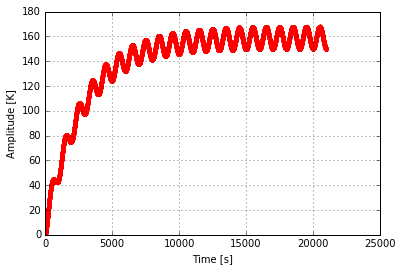

In [16]:
#lege sinusfunktion an wie in aufgabe beschrieben
time = np.arange(0,350*60,0.5)

# timespan: zeitspanne des experiments in sekunden: 600[sek]
# delta_t: zeitdelte der auswertungen, auswertung alle 0.5[sek]
# frequence: frequenz mit der die sinusschwingung beeinflusst
def create_input(timespan, delta_t, frequence):
    array = np.zeros(np.int(timespan/delta_t))
    time = 0
    i = 0
    while time < timespan:
        array[i] = (1000*np.sin(2*np.pi*frequence*time) + 1000)
        i = i+1
        time = time + delta_t
    return array
        
#plotte das ergebnis
input = create_input(350*60, 0.5, 0.001)      
output, time_out, xout =  c.lsim(sys,input,time)
plt.plot(time_out,output,'r.')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [K]')

#bestimme amplitude und Verschiebung auf y-Achse der Sinuskurve
stable_max = np.max(output[35000:])
stable_min = np.min(output[35000:])
stable_mean = np.mean(output[35000:])

print ("stable amplitude = " +str(stable_max-stable_min))
print ("stable mean = " +str(stable_mean))
plt.grid()

Die Grafik Zeigt die Antwort des Systems auf eine wie in der Aufgabe beschriebene Sinusschwingung des Eingangssignals.
Die Sinusschwingung des Eingangssignals lässt sich eindeutig im Plot erkennen. Schon nach einer Zeit von ca. 13000 Sekunden lässt sich eine konstante Schwingung erkennen.Diese Schwingung hat eine Amplitude von ca. 9°K und eine schwingt um einen Wert ca. 159 °K.

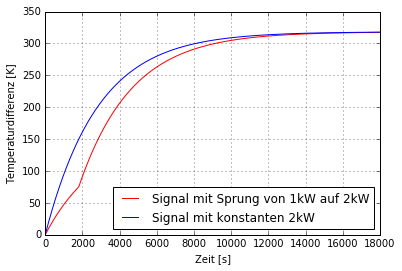

In [23]:
time = np.arange(0,300*60,0.5)
input = np.zeros(len(time))+1000
input_2kW = np.zeros(len(time))+2000

for i, val in enumerate(time):
    if (val > 30*60): input[i] = 2000
        
output, time_out, xout =  c.lsim(sys,input,time)
output_2kW, time_out_2kW, xout_2kW =  c.lsim(sys,input_2kW,time)

plt.plot(time_out,output,'r')
plt.plot(time_out,output_2kW,'b')
plt.legend(["Signal mit Sprung von 1kW auf 2kW","Signal mit konstanten 2kW"], loc=4)
plt.xlabel('Zeit [s]')
plt.ylabel('Temperaturdifferenz [K]')
plt.grid()

Im Plot ist eine geringer werdende Temperaturzunahme bis zu $t=1800$ zu erkennen, das durch das anfängliche Eingangssignal von 1kW gegeben ist. Der Sprung von 1kW auf 2kW ist deutlich zu erkennen, in Form der plötzlichen Zunahme der Temperatursteigung. Wie im Plot zu erkennen, ist der Output des anfangs schwächeren Signals stehts unterhalb dem Output des konstanten Signals von 2kW. Wie zu erwarten konvergieren beide Outputsignale gegen den selben Grenzwert.

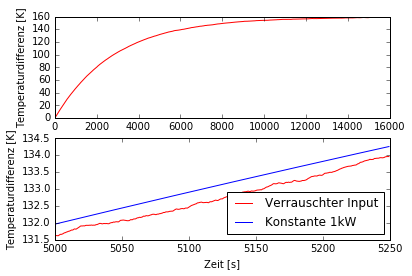

In [34]:
#lege signal an
time = np.arange(0,250*60,0.5)
stable_input = np.zeros(len(time))+1000 #stabiler teil des signals
noise_input = (np.random.rand(len(time))-0.5)*1000 #Rauschen des Signals
input = stable_input + noise_input # kompiniere beide für verrauschtes eingangssignal
output, time_out, xout =  c.lsim(sys,input,time)
output_stable, time_out_stable, xout_stable =  c.lsim(sys,stable_input,time)

#plotte output
plt.subplot(2, 1, 1)
plt.plot(time_out,output,'r')
#plt.plot(time_out,output_stable,'b')
plt.xlabel('Zeit [s]')
plt.ylabel('Temperaturdifferenz [K]')

plt.subplot(2, 1, 2)
start_time = 10000
end_time = 10500
plt.plot(time_out[start_time:end_time],output[start_time:end_time],'r')
plt.plot(time_out[start_time:end_time],output_stable[start_time:end_time],'b')
plt.xlabel('Zeit [s]')
plt.ylabel('Temperaturdifferenz [K]')
plt.legend(["Verrauschter Input","Konstante 1kW"], loc=4)

plt.show()

Die rote Kurve der oberen Grafik zeigt die Reaktion des Systems auf ein Eingangssignal von 1kW mit einer gleichverteilten Störung von 500W. In dem hier gezeigten Ausschnitt ist die Störung kaum bis gar nicht zu erkennen, lediglich die mittlere Leistung von 1kW ist erkennbar durch den allgemeinen Trend der Kurve.

In der unteren Grafik wird ein Ausschnitt des Outputsignals bei verrauschtem Eingangssignal gezeigt, zusammen vom dem Output eines konstanten Signals von 1kW. Bei Betrachtung eines kleinen Zeitintervalls der beiden Kurven, ist der Effekt des Störsignals bei der roten Kurve deutlich zu erkennen. Zu anfang wirken sich die Leistungsschwankungne noch nicht so deutlich auf die Gradlinigkeit der Kurve aus, was sich im späteren verlauf jedoch ändert, da der Temperaturverlust durch die Wärmeabgabe an die Umgebung einen stärkeren Einfluss erhält. Die Abweichungen zur blauen Kurve sind bei entsprechend genauer Betrachtung gut zu erkennen, jedoch ist die Differenz der beiden Kurven für gewöhnlich unter 1 °K (siehe untere Grafik).

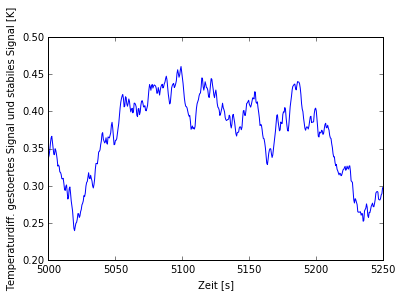

In [35]:
plt.plot(time_out[start_time:end_time],output_stable[start_time:end_time]-output[start_time:end_time],'b')
plt.xlabel('Zeit [s]')
plt.ylabel('Temperaturdiff. gestoertes Signal und stabiles Signal [K]')

Betrachtet man die Temperaturdifferenz der beiden Signale, so lässt sich der Einfluss vom Rauschen der Eingangsleistung auf die Temperatur deutlich durch den zackigen Verlauf erkennen. Des weiteren nimmt die Differenz willkürlich zu und ab.